In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import roc_auc_score

from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import BernoulliNB 

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

import category_encoders as ce

from sklearn import svm
from sklearn.svm import SVC

import dtreeviz
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import export_graphviz
#import pydotplus
from IPython.display import Image

from sklearn.metrics import f1_score

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate

### Область работы 2 (поиск  модели .... )

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = pd.read_csv('train.csv') # содержит только имя файла, без имен папок !!!
df = path_train
df.head()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
0,1.0,28.00,2.000,2.0,4.0,8.0,4.165,1.0,1.0,2.0,1.0,2.0,181.0,1.0,1.0
1,1.0,36.25,5.000,2.0,8.0,5.0,2.500,1.0,1.0,6.0,0.0,2.0,0.0,368.0,1.0
2,0.0,29.50,2.000,1.0,10.0,8.0,2.000,0.0,0.0,0.0,0.0,2.0,256.0,18.0,0.0
3,1.0,22.67,0.165,2.0,8.0,3.0,2.250,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,0.0,25.75,0.500,2.0,8.0,8.0,0.875,1.0,0.0,0.0,1.0,2.0,491.0,1.0,1.0


In [3]:
df.describe()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.679181,31.718737,4.818660,1.771331,7.354949,4.742321,2.342773,0.530717,0.436860,2.498294,0.462457,1.928328,182.001706,972.648464,0.445392
std,0.467190,11.903846,4.973202,0.428391,3.675786,2.006864,3.505711,0.499482,0.496421,4.994441,0.499015,0.306594,174.576425,5156.884823,0.497434
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.830000,1.085000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.000000,0.000000,2.000000,73.500000,1.000000,0.000000
50%,1.000000,28.920000,3.000000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,160.000000,5.000000,0.000000
75%,1.000000,38.065000,7.070000,2.000000,10.000000,5.000000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,266.750000,434.000000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.000000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   C1       586 non-null    float64
 1   N2       586 non-null    float64
 2   N3       586 non-null    float64
 3   C4_enc   586 non-null    float64
 4   C5_enc   586 non-null    float64
 5   C6_enc   586 non-null    float64
 6   N7       586 non-null    float64
 7   C8       586 non-null    float64
 8   C9       586 non-null    float64
 9   N10      586 non-null    float64
 10  C11      586 non-null    float64
 11  C12_enc  586 non-null    float64
 12  N13      586 non-null    float64
 13  N14      586 non-null    float64
 14  Target   586 non-null    float64
dtypes: float64(15)
memory usage: 68.8 KB


In [10]:
df.isna().sum()

C1         0
N2         0
N3         0
C4_enc     0
C5_enc     0
C6_enc     0
N7         0
C8         0
C9         0
N10        0
C11        0
C12_enc    0
N13        0
N14        0
Target     0
dtype: int64

In [4]:
X = df.drop(['Target'], axis = 1)
y = df['Target']
cat_features = ['C4_enc','C5_enc','C6_enc','C12_enc']
axis_features = ['C1','C8','C9','C11']
num_features = ['N2', 'N3','N7','N10','N13','N14']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [6]:
axis_transformer = Pipeline(steps=[
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

CT = ColumnTransformer([
        ("pol_std", axis_transformer, axis_features),
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(), cat_features)
        ])

display(CT)

res_ct = CT.fit_transform(X_train)
pd.DataFrame(res_ct).head()

ColumnTransformer(transformers=[('pol_std',
                                 Pipeline(steps=[('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['C1', 'C8', 'C9', 'C11']),
                                ('num', StandardScaler(),
                                 ['N2', 'N3', 'N7', 'N10', 'N13', 'N14']),
                                ('cat', OneHotEncoder(),
                                 ['C4_enc', 'C5_enc', 'C6_enc', 'C12_enc'])])

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.708401,-1.102822,-0.915732,-0.933888,0.708401,-0.779643,-0.643268,-0.704521,-1.102822,-0.74366,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.708401,-1.102822,-0.915732,-0.933888,0.708401,-0.779643,-0.643268,-0.704521,-1.102822,-0.74366,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.411631,-1.102822,-0.915732,-0.933888,-1.411631,-0.779643,-0.643268,-0.704521,-1.102822,-0.74366,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.708401,-1.102822,-0.915732,-0.933888,0.708401,-0.779643,-0.643268,-0.704521,-1.102822,-0.74366,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.708401,-1.102822,-0.915732,-0.933888,0.708401,-0.779643,-0.643268,-0.704521,-1.102822,-0.74366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
column_trans = make_column_transformer(
    (KNNImputer(missing_values=np.nan, n_neighbors=3, weights="uniform"), ['N2', 'N3','N7','N10','N13','N14']) 
     )

X_ct = column_trans.fit_transform(X_train)

df_knn = pd.DataFrame(X_ct, columns = column_trans.get_feature_names_out(), index = X_train.index)
display(df_knn.head())
df_knn.describe()

,knnimputer__N2,knnimputer__N3,knnimputer__N7,knnimputer__N10,knnimputer__N13,knnimputer__N14
509,18.33,1.210,0.00,0.0,100.0,1.0
396,16.92,0.335,0.29,0.0,200.0,1.0
147,20.75,9.540,0.04,0.0,200.0,1001.0
203,37.50,0.835,0.04,0.0,120.0,6.0
520,36.08,2.540,0.00,0.0,0.0,1001.0


,knnimputer__N2,knnimputer__N3,knnimputer__N7,knnimputer__N10,knnimputer__N13,knnimputer__N14
count,410.00000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,31.65022,4.986598,2.377854,2.726829,183.717073,1066.963415
std,11.97808,4.971828,3.563177,5.444408,185.478468,5860.611033
min,13.75000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.71000,1.250000,0.165000,0.000000,60.000000,1.000000
50%,29.04500,3.000000,1.000000,0.000000,160.000000,7.000000
75%,37.45750,8.281250,3.165000,3.000000,262.250000,478.500000
max,76.75000,28.000000,28.500000,67.000000,2000.000000,100001.000000


In [46]:
gbr_grid_search = GridSearchCV(KNeighborsClassifier(),
                               [{'n_neighbors': [1, 2,3, 5, 7, 27, 14]}],
                               cv=5,
                               scoring = 'f1', 
                               n_jobs = -1,
                               error_score= 'raise',
                               verbose=1)
gbr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=-1, param_grid=[{'n_neighbors': [1, 2, 3, 5, 7, 27, 14]}],
             scoring='f1', verbose=1)

In [47]:
grid_search1 = pd.DataFrame(gbr_grid_search.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_search1

,4,6,5,3,0,2,1
mean_fit_time,0.004787,0.003629,0.003987,0.003201,0.007753,0.003654,0.005647
std_fit_time,0.00213,0.000444,0.000005,0.000508,0.0,0.000548,0.001914
mean_score_time,0.010386,0.007837,0.010795,0.009785,0.011616,0.010572,0.011759
std_score_time,0.001039,0.002054,0.001762,0.000752,0.0,0.000489,0.000174
param_n_neighbors,7,14,27,5,1,3,2
params,{'n_neighbors': 7},{'n_neighbors': 14},{'n_neighbors': 27},{'n_neighbors': 5},{'n_neighbors': 1},{'n_neighbors': 3},{'n_neighbors': 2}
split0_test_score,0.72973,0.742857,0.746667,0.712329,0.666667,0.641026,0.551724
split1_test_score,0.529412,0.606061,0.617647,0.588235,0.606061,0.523077,0.444444
split2_test_score,0.690476,0.648649,0.631579,0.651163,0.658537,0.60241,0.571429
split3_test_score,0.606061,0.606061,0.626866,0.523077,0.521739,0.507463,0.491228


In [95]:
pipe = Pipeline([('preprocessing', [MinMaxScaler(), RobustScaler(),StandardScaler()]), 
                 ('regressor',    KNeighborsClassifier())])

kfold = KFold(n_splits=10, shuffle=True)


p = [1,2]
weights = ['distance','uniform']
n_neighbors = np.arange(60,200)
scaling = [MinMaxScaler(), RobustScaler(),StandardScaler()]

param_grid =[
    {'preprocessing': scaling, 
     'estimator': [KNeighborsClassifier()],
         'regressor__n_neighbors': n_neighbors,
         'regressor__p': p,
         'regressor__weights': weights
     }]

grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='f1', n_jobs = -1,return_train_score=True)
grid.fit(X_train,y_train)
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        [MinMaxScaler(), RobustScaler(),
                                         StandardScaler()]),
                                       ('regressor', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'preprocessing': [MinMaxScaler(), RobustScaler(),
                                            StandardScaler()],
                          'regressor': [KNeighborsClassifier()],
                          'regressor__n_neighbors': ar...
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199]),
                          'regressor__p': [1, 2],
                          'regressor__weights': ['distance', 'uniform']}],
             return_train_score=True, scoring='f1')

In [94]:
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на" '\n'
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

Наилучшие параметры:
{'preprocessing': MinMaxScaler(), 'regressor': KNeighborsClassifier(), 'regressor__n_neighbors': 94, 'regressor__p': 2, 'regressor__weights': 'uniform'}

Средняя правильность для наилучшей модели кроссвалидации на
валидационных тестовых наборах: 0.873235

Правильность для наилучшей модели на тестовом наборе: 0.833333



,59,154,162,225,233,170,241,253,245,63,...,923,927,931,935,939,943,947,951,959,955
mean_fit_time,0.005687,0.005487,0.005686,0.005438,0.005536,0.005437,0.004988,0.005684,0.005587,0.005736,...,0.00778,0.00768,0.007879,0.00728,0.007282,0.007779,0.007581,0.007181,0.00768,0.00788
std_fit_time,0.00064,0.000548,0.000746,0.000685,0.000846,0.000904,0.000388,0.000639,0.000623,0.001123,...,0.000978,0.000898,0.001425,0.000456,0.000898,0.000598,0.000697,0.000598,0.000638,0.000828
mean_score_time,0.009226,0.007431,0.007332,0.009625,0.009526,0.00728,0.008927,0.008978,0.009076,0.009526,...,0.031822,0.031871,0.031718,0.031771,0.031718,0.032017,0.032566,0.032817,0.032318,0.032821
std_score_time,0.000926,0.000722,0.00095,0.002046,0.002235,0.000457,0.000721,0.001179,0.0007,0.001675,...,0.000827,0.000818,0.000898,0.00114,0.00136,0.000799,0.000866,0.001332,0.00146,0.001312
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
param_regressor,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),...,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_regressor__n_neighbors,94,118,120,136,138,122,140,143,141,95,...,190,191,192,193,194,195,196,197,199,198
param_regressor__p,2,2,2,1,1,2,1,1,1,2,...,2,2,2,2,2,2,2,2,2,2
param_regressor__weights,uniform,distance,distance,uniform,uniform,distance,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
params,"{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...",...,"{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':...","{'preprocessing': RobustScaler(), 'regressor':..."


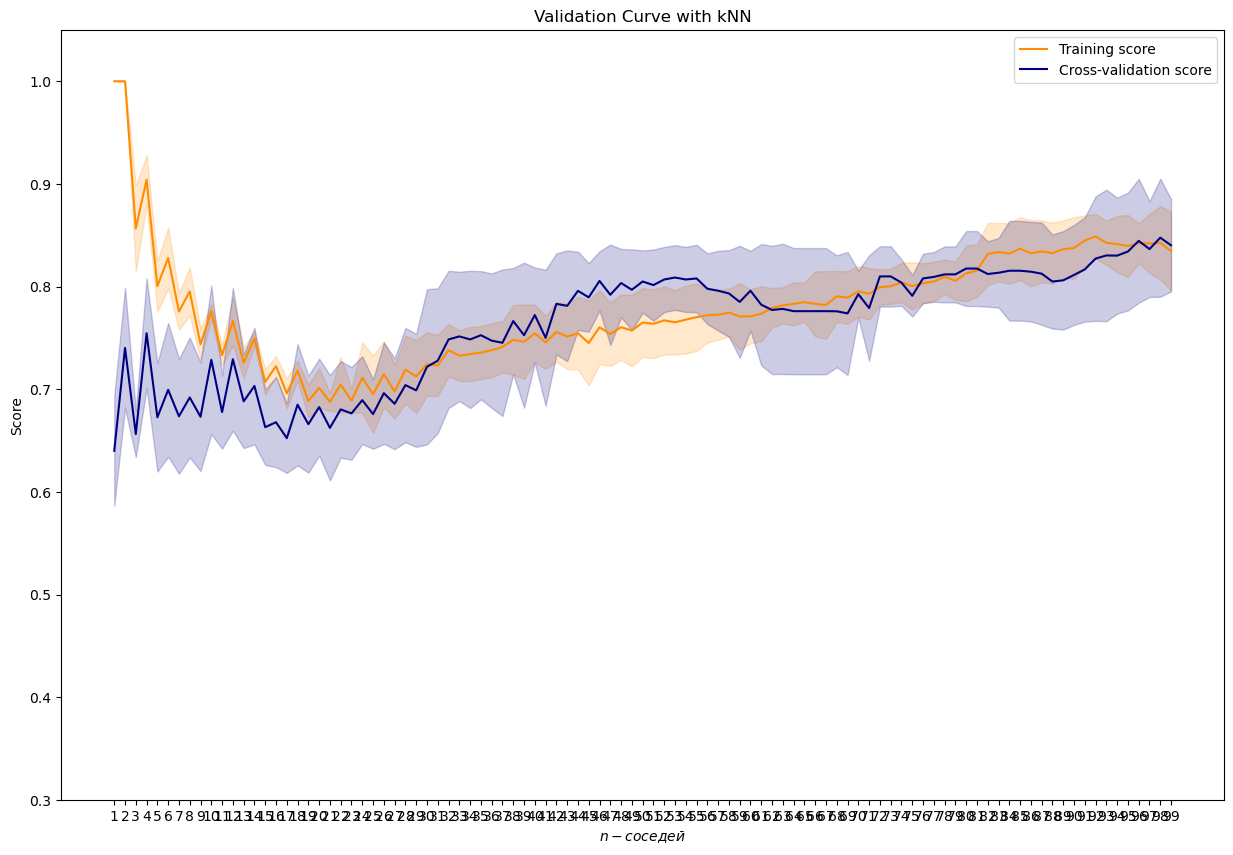

In [55]:
n_range = np.arange(1,100)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train,
    param_name="n_neighbors", 
    param_range=n_range,
    cv = ShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42), 
    scoring="precision", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve with kNN")
plt.xlabel("$n-соседей$")
plt.ylabel("Score")
plt.ylim(0.3, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.legend(loc="best")
plt.xticks(n_range)
plt.show()

Дальше попробуем $метод$ $опорных$ $векторов$

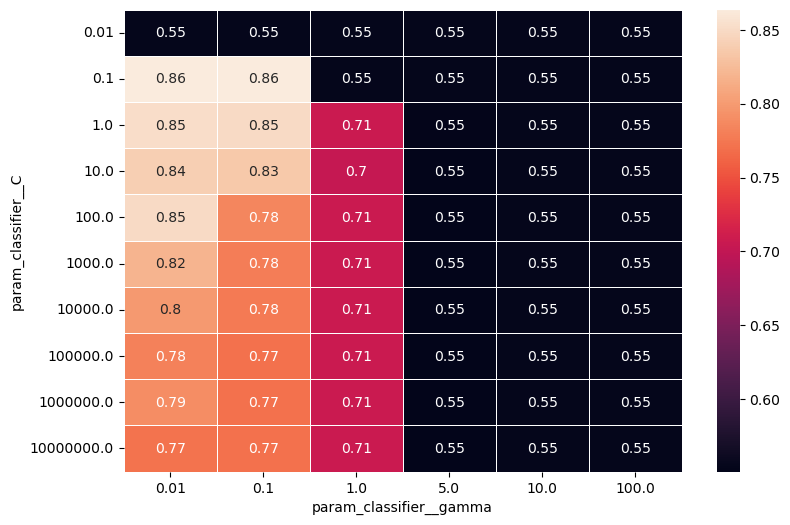

In [64]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_test, y_test)
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', svm.SVC())])

C=np.array([0.01,0.1,1,10,100,10**3,10**4, 10**5,10**6,10**7])
gamma=[0.01,0.1,1,5,10,100]

param_grid =[
    {'preprocessing': [StandardScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X,y)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

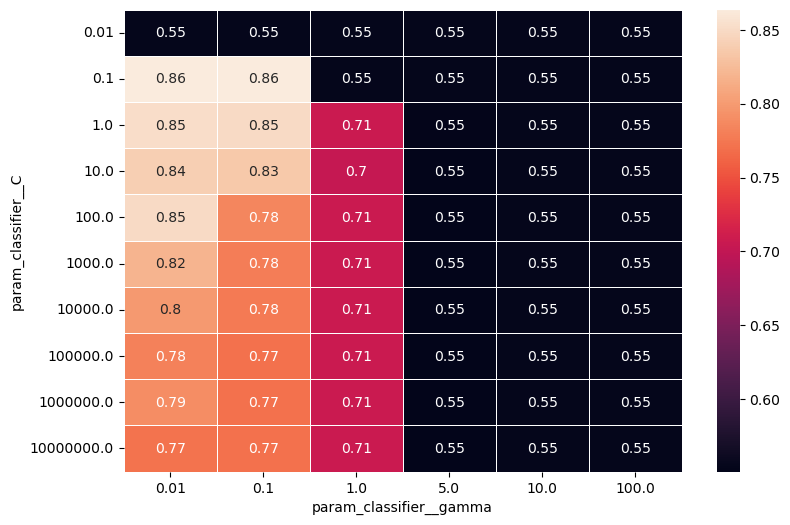

In [28]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', svm.SVC())])

C=np.array([0.01,0.1,1,10,100,10**3,10**4, 10**5,10**6,10**7])
gamma=[0.01,0.1,1,5,10,100]

param_grid =[
    {'preprocessing': [StandardScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X,y)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

Правильность на обучающем наборе: 0.920
Правильность на тестовом наборе: 0.835


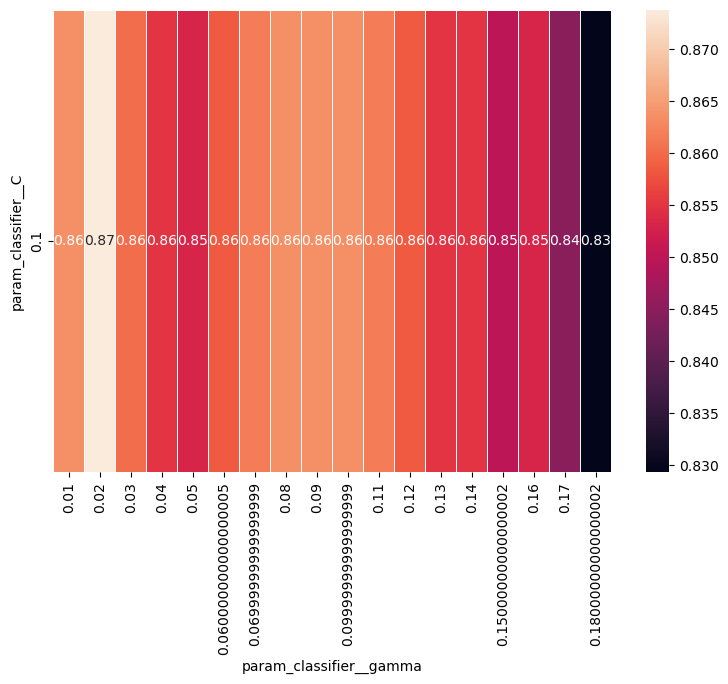

In [85]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', svm.SVC())])

C=np.arange(0.1, 1.0)
gamma=np.arange(0.01,0.19, 0.01)

param_grid =[
    {'preprocessing': [StandardScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X,y)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

print('Правильность на обучающем наборе: {:.3f}'.format(clf.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(clf.score(X_test, y_test)))

Правильность на обучающем наборе: 0.910
Правильность на тестовом наборе: 0.841


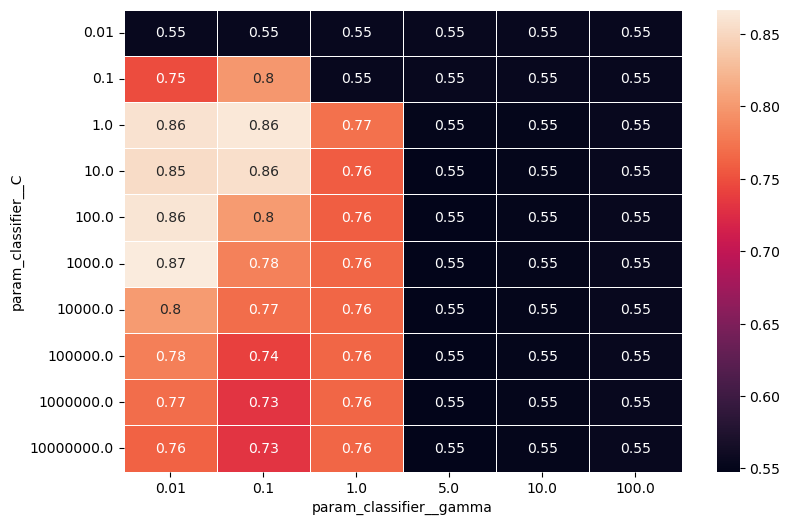

In [86]:
clf = make_pipeline(RobustScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier', svm.SVC())])

C=np.array([0.01,0.1,1,10,100,10**3,10**4, 10**5,10**6,10**7])
gamma=[0.01,0.1,1,5,10,100]

param_grid =[
    {'preprocessing': [RobustScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X,y)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

print('Правильность на обучающем наборе: {:.3f}'.format(clf.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(clf.score(X_test, y_test)))

In [ ]:
clf = make_pipeline(RobustScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier', svm.SVC())])

C=np.arange(50.0, 5000.0)
gamma=np.arange(0.01,0.19, 0.01)

param_grid =[
    {'preprocessing': [RobustScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, n_jobs = -1)
grid.fit(X,y)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

In [181]:
clf = make_pipeline(MinMaxScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pipe = Pipeline([('preprocessing', [MinMaxScaler(), RobustScaler(), StandardScaler()]), 
                 ('classifier', svm.SVC())])

kfold = KFold(n_splits=10, shuffle=True)


C=np.array([0.01,0.1,1,10,100,10**3,10**4, 10**5,10**6,10**7])
gamma=np.array([1,2,5,7,10,15,20])

param_grid =[
    {'preprocessing': [MinMaxScaler(), RobustScaler(), StandardScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, n_jobs = -1)
grid1.fit(X_train,y_train)
#table=pd.DataFrame(grid.cv_results_)
#pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
#pv_table
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

#print('Правильность на обучающем наборе: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Правильность на тестовом наборе: {:.3f}'.format(clf.score(X_test, y_test)))

print("Наилучшие параметры:\n{}\n".format(grid1.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на" '\n'
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid1.score(X_test, y_test)))
grid_result = pd.DataFrame(grid1.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

Наилучшие параметры:
{'classifier': SVC(), 'classifier__C': 0.1, 'classifier__gamma': 1, 'preprocessing': MinMaxScaler()}

Средняя правильность для наилучшей модели кроссвалидации на
валидационных тестовых наборах: 0.860976

Правильность для наилучшей модели на тестовом наборе: 0.835227



,21,42,45,63,24,48,51,84,66,69,...,176,197,49,70,91,112,133,154,175,196
mean_fit_time,0.010972,0.010472,0.01152,0.010971,0.012767,0.013864,0.014912,0.012667,0.011969,0.016507,...,0.018253,0.018251,0.017799,0.019948,0.0193,0.021695,0.021496,0.021044,0.019749,0.022094
std_fit_time,0.000003,0.001022,0.001008,0.002713,0.000746,0.000487,0.000786,0.003865,0.001093,0.001924,...,0.004446,0.001787,0.000838,0.001201,0.000999,0.003853,0.001831,0.001652,0.001704,0.0029
mean_score_time,0.004886,0.004189,0.004288,0.00374,0.004838,0.004887,0.004439,0.003391,0.004438,0.004638,...,0.005686,0.005437,0.005432,0.005984,0.005237,0.005884,0.006734,0.005685,0.006334,0.006334
std_score_time,0.001443,0.000399,0.000457,0.000402,0.000631,0.000299,0.000471,0.000489,0.000568,0.000893,...,0.00064,0.000565,0.000797,0.00148,0.000402,0.001041,0.003451,0.000457,0.001513,0.001376
param_classifier,SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),...,SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC()
param_classifier__C,0.1,1.0,1.0,10.0,0.1,1.0,1.0,100.0,10.0,10.0,...,1000000.0,10000000.0,1.0,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0
param_classifier__gamma,1,1,2,1,2,5,7,1,2,5,...,5,5,5,5,5,5,5,5,5,5
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
params,"{'classifier': SVC(), 'classifier__C': 0.1, 'c...","{'classifier': SVC(), 'classifier__C': 1.0, 'c...","{'classifier': SVC(), 'classifier__C': 1.0, 'c...","{'classifier': SVC(), 'classifier__C': 10.0, '...","{'classifier': SVC(), 'classifier__C': 0.1, 'c...","{'classifier': SVC(), 'classifier__C': 1.0, 'c...","{'classifier': SVC(), 'classifier__C': 1.0, 'c...","{'classifier': SVC(), 'classifier__C': 100.0, ...","{'classifier': SVC(), 'classifier__C': 10.0, '...","{'classifier': SVC(), 'classifier__C': 10.0, '...",...,"{'classifier': SVC(), 'classifier__C': 1000000...","{'classifier': SVC(), 'classifier__C': 1000000...","{'classifier': SVC(), 'classifier__C': 1.0, 'c...","{'classifier': SVC(), 'classifier__C': 10.0, '...","{'classifier': SVC(), 'classifier__C': 100.0, ...","{'classifier': SVC(), 'classifier__C': 1000.0,...","{'classifier': SVC(), 'classifier__C': 10000.0...","{'classifier': SVC(), 'classifier__C': 100000....","{'classifier': SVC(), 'classifier__C': 1000000...","{'classifier': SVC(), 'classifier__C': 1000000..."
split0_test_score,0.878049,0.902439,0.902439,0.878049,0.878049,0.853659,0.829268,0.804878,0.804878,0.804878,...,0.487805,0.487805,0.487805,0.487805,0.487805,0.487805,0.487805,0.487805,0.487805,0.487805


In [ ]:
clf = make_pipeline(MinMaxScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pipe = Pipeline([('preprocessing', [MinMaxScaler(), RobustScaler(), StandardScaler()]), 
                 ('classifier', svm.SVC())])

kfold = KFold(n_splits=10, shuffle=True)


C=np.array([0.01,0.1,1,10,100,10**3,10**4, 10**5,10**6,10**7])
gamma=np.array([0.01,0.1,1,2,5,10])

param_grid =[
    {'preprocessing': [MinMaxScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, n_jobs = -1)
grid.fit(X,y)
#table=pd.DataFrame(grid.cv_results_)
#pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
#pv_table
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

#print('Правильность на обучающем наборе: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Правильность на тестовом наборе: {:.3f}'.format(clf.score(X_test, y_test)))

print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на" '\n'
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

In [ ]:
clf = make_pipeline(MinMaxScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', svm.SVC())])

C=np.arange(0.1, 50.0)
gamma=np.arange(0.01,1.0, 0.01)

param_grid =[
    {'preprocessing': [MinMaxScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, n_jobs = -1)
grid.fit(X,y)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

In [52]:
rf_1= RandomForestClassifier(n_estimators=5, random_state=42)
rf_1.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_1.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_1.score(X_test, y_test)))

Правильность на обучающем наборе: 0.968
Правильность на тестовом наборе: 0.869


In [53]:
rf_2= RandomForestClassifier(n_estimators=500, max_features='sqrt',  random_state=42)
rf_2.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_2.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_2.score(X_test, y_test)))
# на тесте переобучились, но неплохо осреднились за счет семплирования

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.858


In [54]:
rf_3= RandomForestClassifier(n_estimators=500, min_samples_leaf = 5, max_features=None,  random_state=42)
rf_3.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_3.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_3.score(X_test, y_test)))
# на тесте остановильсь принудительно по глубине и неплохо осреднились, фичи не семплировали - их очень мало!

Правильность на обучающем наборе: 0.951
Правильность на тестовом наборе: 0.847


In [101]:
rf_4= RandomForestClassifier(n_estimators=500, max_features='sqrt', min_samples_leaf = 5,  random_state=42)
rf_4.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_4.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_4.score(X_test, y_test)))
# на тесте остановильсь вовремя и неплохо осреднились, но сэмплирование фич тут лишнее, фич мало...

Правильность на обучающем наборе: 0.944
Правильность на тестовом наборе: 0.875


In [104]:
forest = RandomForestClassifier(n_estimators=1000, max_features='sqrt', min_samples_leaf = 5, random_state=42, 
                                oob_score = True) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))


Правильность на обучающем наборе: 0.944
Правильность на OOB: 0.868
Правильность на тестовом наборе: 0.869


In [59]:
forest = RandomForestClassifier(n_estimators=1000, max_features=10, random_state=42,
                               oob_score = True) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на OOB: 0.890
Правильность на тестовом наборе: 0.841


In [128]:
rf1 = RandomForestClassifier()

pipe = Pipeline([('preprocessing', [MinMaxScaler(), RobustScaler(), StandardScaler()]), 
                 ('classifier', rf1)])

kfold = KFold(n_splits=10, shuffle=True)

param_grid = [
    { 
     
    'n_estimators': [500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,5,7,8]
}
             ]
CV_rf = GridSearchCV(rf1, param_grid=param_grid, cv= kfold, n_jobs = -1, return_train_score=True)
CV_rf.fit(X_train, y_train)


C:\Users\idkwh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1789 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\idkwh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\idkwh\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\idkwh\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\idkwh\anaconda3\lib\site-pac

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 5, 6, 7, 8],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 3, 5, 7, 8],
                          'n_estimators': [200, 500, 1000]}],
             return_train_score=True)

In [160]:
porogi = np.unique(CV_rf.predict_proba(X_test)[:,1])
proba = CV_rf.predict_proba(X_test)[:,1]

In [157]:
y_pred = CV_rf.predict_proba(X_test)
y_pred

array([[0.91812381, 0.08187619],
       [0.92928946, 0.07071054],
       [0.51598799, 0.48401201],
       [0.13785968, 0.86214032],
       [0.23523684, 0.76476316],
       [0.83836651, 0.16163349],
       [0.19595238, 0.80404762],
       [0.39436928, 0.60563072],
       [0.98946699, 0.01053301],
       [0.89388241, 0.10611759],
       [0.42700536, 0.57299464],
       [0.40551141, 0.59448859],
       [0.50725807, 0.49274193],
       [0.67637494, 0.32362506],
       [0.96171575, 0.03828425],
       [0.94139522, 0.05860478],
       [0.70576689, 0.29423311],
       [0.90864511, 0.09135489],
       [0.92754126, 0.07245874],
       [0.12784806, 0.87215194],
       [0.00780587, 0.99219413],
       [0.50271475, 0.49728525],
       [0.64919615, 0.35080385],
       [0.72058023, 0.27941977],
       [0.2400127 , 0.7599873 ],
       [0.3983021 , 0.6016979 ],
       [0.83268102, 0.16731898],
       [0.68493744, 0.31506256],
       [0.84171847, 0.15828153],
       [0.05351571, 0.94648429],
       [0.

In [180]:
max_f1 = 0
max_por = 0

y_pred = CV_rf.predict_proba(X_test)[:,1]

for i in porogi:
    y_pred_class = (y_pred>i).astype(int)
    f1_c = f1_score(y_test,y_pred_class)
    
    if f1_c > max_f1:
        max_f1 = f1_c
        max_por = i
print(max_f1, i)

0.8319999999999999 0.9930663407957145


In [140]:
CV_rf.best_params_
CV_rf.best_score_

0.8975609756097562

In [139]:
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(CV_rf.score(X_test, y_test)))
grid_result = pd.DataFrame(CV_rf.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

Правильность для наилучшей модели на тестовом наборе: 0.852273



,307,631,577,234,633,236,290,311,614,615,...,602,603,604,605,606,607,608,609,610,611
mean_fit_time,2.063825,1.326383,1.292945,0.56454,0.515061,2.881618,4.670074,3.147879,2.610168,0.518951,...,0.000849,0.000598,0.000997,0.000598,0.000749,0.000798,0.000499,0.000499,0.000698,0.000698
std_fit_time,0.226523,0.020941,0.019655,0.008405,0.007073,0.067965,0.090037,0.051773,0.024575,0.007547,...,0.000451,0.000489,0.000446,0.000489,0.000513,0.000399,0.000499,0.000499,0.000457,0.000457
mean_score_time,0.085938,0.05571,0.053071,0.025886,0.022791,0.122044,0.195722,0.131721,0.104438,0.023543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.009429,0.00289,0.000674,0.000519,0.000706,0.003837,0.005585,0.008657,0.002309,0.001557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_criterion,gini,entropy,entropy,gini,entropy,gini,gini,gini,entropy,entropy,...,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy
param_max_depth,8,8,7,7,8,7,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
param_max_features,log2,log2,log2,sqrt,log2,sqrt,sqrt,log2,sqrt,sqrt,...,auto,auto,auto,auto,auto,auto,auto,auto,auto,auto
param_min_samples_leaf,1,1,1,1,2,1,1,2,1,2,...,3,5,5,5,7,7,7,8,8,8
param_n_estimators,500,500,500,200,200,1000,1000,1000,1000,200,...,1000,200,500,1000,200,500,1000,200,500,1000
params,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 7, 'max_...","{'criterion': 'gini', 'max_depth': 7, 'max_fea...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'gini', 'max_depth': 7, 'max_fea...","{'criterion': 'gini', 'max_depth': 8, 'max_fea...","{'criterion': 'gini', 'max_depth': 8, 'max_fea...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 8, 'max_...",...,"{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 8, 'max_...","{'criterion': 'entropy', 'max_depth': 8, 'max_..."


In [ ]:
rf.fit(x_train, y_train)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train, y_train)

for i in range of 500
threshold = np.unique()

predicted = random_forest.predict_proba(X_test)
predicted[:,0] = (predicted[:,0] < threshold).astype('int')
predicted[:,1] = (predicted[:,1] >= threshold).astype('int')


Отчаялась и пробую эту вашу $метамодель$

In [182]:
clf_v1 = grid
clf_v2 = grid1
clf_v3 = CV_rf


In [ ]:
e_s_clf = StackingClassifier(
        estimators = [
            ('knn', clf_v1), 
            ('svm', clf_v2), 
            ('rf', clf_v3)],
        final_estimator = RandomForestClassifier(n_estimators=50),
        stack_method = 'predict_proba',
        n_jobs = -1
)

e_s_clf.fit(X_train,y_train)

In [ ]:
print("Средняя правильность для наилучшей модели кроссвалидации на" '\n'
      "валидационных тестовых наборах: {:.6f}\n".format(e_s_clf.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(e_s_clf.score(X_test, y_test)))